In [134]:
# Four different Portfolios, from less risky to most (composition stocks/bonds/cryptos/commodities)
# 1. Conservative: 20%/60%/10%/10%
# 2. Balanced:40%/40%/10%/10%
# 3. Growth: 60%/20%/10%/10%
# 4. Aggressive: 70%/5%/15%/10%

In [135]:
import pandas as pd
import numpy as np
import datetime
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

from yahoo_fin.stock_info import get_data

In [136]:
# Setting date range and tickers
start = datetime.datetime(2017, 12, 31)

ticker_list = ["^GSPC", "^TNX", "BTC-USD", "BZ=F", "^GSPC"]
historical_datas = {}
for ticker in ticker_list:
    historical_datas[ticker] = get_data(ticker, start_date = start, interval="1d")

In [137]:
historical_datas

{'^GSPC':                    open         high          low        close     adjclose  \
 2018-01-02  2683.729980  2695.889893  2682.360107  2695.810059  2695.810059   
 2018-01-03  2697.850098  2714.370117  2697.770020  2713.060059  2713.060059   
 2018-01-04  2719.310059  2729.290039  2719.070068  2723.989990  2723.989990   
 2018-01-05  2731.330078  2743.449951  2727.919922  2743.149902  2743.149902   
 2018-01-08  2742.669922  2748.510010  2737.600098  2747.709961  2747.709961   
 ...                 ...          ...          ...          ...          ...   
 2023-02-06  4119.569824  4124.629883  4093.379883  4111.080078  4111.080078   
 2023-02-07  4105.350098  4176.540039  4088.389893  4164.000000  4164.000000   
 2023-02-08  4153.470215  4156.850098  4111.669922  4117.859863  4117.859863   
 2023-02-09  4144.250000  4156.229980  4069.669922  4081.500000  4081.500000   
 2023-02-10  4068.919922  4094.360107  4060.790039  4090.459961  4090.459961   
 
                 volume ticke

In [138]:
historical_datas['^GSPC']

,open,high,low,close,adjclose,volume,ticker
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3397430000,^GSPC
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3544030000,^GSPC
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3697340000,^GSPC
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3239280000,^GSPC
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3246160000,^GSPC
...,...,...,...,...,...,...,...
2023-02-06,4119.569824,4124.629883,4093.379883,4111.080078,4111.080078,4114240000,^GSPC
2023-02-07,4105.350098,4176.540039,4088.389893,4164.000000,4164.000000,4355860000,^GSPC
2023-02-08,4153.470215,4156.850098,4111.669922,4117.859863,4117.859863,4029820000,^GSPC
2023-02-09,4144.250000,4156.229980,4069.669922,4081.500000,4081.500000,4270200000,^GSPC


In [139]:
# Separate ticker data
STOCK = historical_datas['^GSPC'].drop('ticker', axis=1)
BOND = historical_datas['^TNX'].drop('ticker', axis=1)
CRYPTO = historical_datas['BTC-USD'].drop('ticker', axis=1)
COMMS = historical_datas['BZ=F'].drop('ticker', axis=1)
MARKET = historical_datas['^GSPC'].drop('ticker', axis=1)

# Concatenate the ticker DataFrames
ticker_data = pd.concat([STOCK, BOND, CRYPTO, COMMS],axis=1, keys=ticker_list).dropna()

# Review the first 5 rows of the Alpaca DataFrame
display(ticker_data.head())
display(ticker_data.tail())


^GSPC                                                      \
                   open         high          low        close     adjclose   
2018-01-02  2683.729980  2695.889893  2682.360107  2695.810059  2695.810059   
2018-01-03  2697.850098  2714.370117  2697.770020  2713.060059  2713.060059   
2018-01-04  2719.310059  2729.290039  2719.070068  2723.989990  2723.989990   
2018-01-05  2731.330078  2743.449951  2727.919922  2743.149902  2743.149902   
2018-01-08  2742.669922  2748.510010  2737.600098  2747.709961  2747.709961   

                           ^TNX                       ...       BTC-USD  \
                  volume   open   high    low  close  ...           low   
2018-01-02  3.397430e+09  2.433  2.480  2.425  2.465  ...  13163.599609   
2018-01-03  3.544030e+09  2.451  2.465  2.440  2.447  ...  14844.500000   
2018-01-04  3.697340e+09  2.473  2.487  2.449  2.453  ...  14522.200195   
2018-01-05  3.239280e+09  2.465  2.480  2.436  2.476  ...  15202.799805   
2018-01-08  3.246160e+09  2.471  2.489  2.462  2.480  ...  14208.200195   

                                                           BZ=F             \
                   close      adjclose        volume       open       high   
2018-01-02  14982.099609  14982.099609  1.684660e+10  66.419998  67.279999   
2018-01-03  15201.000000  15201.000000  1.687190e+10  66.489998  68.010002   
2018-01-04  15599.200195  15599.200195  2.178320e+10  68.000000  68.260002   
2018-01-05  17429.500000  17429.500000  2.384090e+10  68.059998  68.089996   
2018-01-08  15170.099609  15170.099609  1.841390e+10  67.820000  67.980003   

                                                      
                  low      close   adjclose   volume  
2018-01-02  66.230003  66.570000  66.570000  24294.0  
2018-01-03  66.400002  67.839996  67.839996  25878.0  
2018-01-04  67.529999  68.070000  68.070000  22840.0  
2018-01-05  67.269997  67.620003  67.620003  18290.0  
2018-01-08  67.449997  67.779999  67.779999  17704.0  

[5 rows x 24 columns]

^GSPC                                                      \
                   open         high          low        close     adjclose   
2023-02-06  4119.569824  4124.629883  4093.379883  4111.080078  4111.080078   
2023-02-07  4105.350098  4176.540039  4088.389893  4164.000000  4164.000000   
2023-02-08  4153.470215  4156.850098  4111.669922  4117.859863  4117.859863   
2023-02-09  4144.250000  4156.229980  4069.669922  4081.500000  4081.500000   
2023-02-10  4068.919922  4094.360107  4060.790039  4090.459961  4090.459961   

                           ^TNX                       ...       BTC-USD  \
                  volume   open   high    low  close  ...           low   
2023-02-06  4.114240e+09  3.599  3.644  3.599  3.634  ...  22692.025391   
2023-02-07  4.355860e+09  3.645  3.681  3.597  3.674  ...  22756.257812   
2023-02-08  4.029820e+09  3.658  3.692  3.630  3.653  ...  22731.097656   
2023-02-09  4.270200e+09  3.586  3.690  3.575  3.683  ...  21773.974609   
2023-02-10  3.891520e+09  3.686  3.747  3.673  3.744  ...  21539.392578   

                                                           BZ=F             \
                   close      adjclose        volume       open       high   
2023-02-06  22760.109375  22760.109375  2.382501e+10  79.750000  81.400002   
2023-02-07  23264.291016  23264.291016  2.718796e+10  81.400002  84.099998   
2023-02-08  22939.398438  22939.398438  2.537137e+10  84.029999  85.160004   
2023-02-09  21819.039062  21819.039062  3.257257e+10  85.070000  85.500000   
2023-02-10  21651.183594  21651.183594  2.707841e+10  84.230003  86.910004   

                                                      
                  low      close   adjclose   volume  
2023-02-06  79.089996  80.989998  80.989998  31365.0  
2023-02-07  81.180000  83.690002  83.690002  24432.0  
2023-02-08  83.500000  85.089996  85.089996  29853.0  
2023-02-09  83.059998  84.500000  84.500000  30520.0  
2023-02-10  83.940002  86.389999  86.389999  30520.0  

[5 rows x 24 columns]

Portfolio Composition

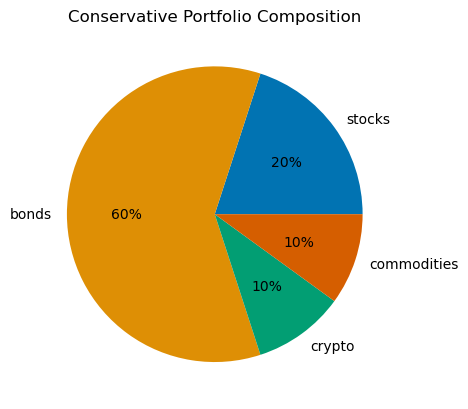

In [140]:
# Conservative Portfolio Composition
invested_amount = 100000
composition = [0.20*invested_amount,0.60*invested_amount,0.10*invested_amount,0.10*invested_amount]
composition_df = pd.DataFrame(composition, columns=["amount"], index=["stocks","bonds","crypto","commodities"])

# Use Seaborn to deliver plot including percentages for each category

# select a palette that takes into account colorblindness
palette_color = sn.color_palette('colorblind')
# plotting data on chart
plt.pie(composition_df.reset_index()['amount'],colors=palette_color,labels=composition_df.reset_index()['index'],autopct='%.0f%%')
plt.title("Conservative Portfolio Composition")
# displaying chart
plt.show()

Risk Return Analysis

In [141]:
STOCK_df = pd.DataFrame(STOCK)
BOND_df = pd.DataFrame(BOND)
CRYPTO_df = pd.DataFrame(CRYPTO)
COMMS_df = pd.DataFrame(COMMS)
MARKET_df = pd.DataFrame(MARKET)

stock_daily_return = pd.DataFrame(STOCK_df['adjclose'].pct_change())
bond_daily_return = pd.DataFrame(BOND_df['adjclose'].pct_change())
cypto_daily_return = pd.DataFrame(CRYPTO_df['adjclose'].pct_change())
comm_daily_return = pd.DataFrame(COMMS_df['adjclose'].pct_change())
market_daily_return = pd.DataFrame(MARKET_df['adjclose'].pct_change())

In [142]:
# Assign weights to each asset
weights = np.array([0.20, 0.60, 0.10, 0.10])

In [143]:
# Create the returns of the sythetic portfolio with those weights

synthetic_portfolio = pd.concat([stock_daily_return, bond_daily_return, cypto_daily_return,comm_daily_return], axis=1).dropna()
synthetic_portfolio.head()


,adjclose,adjclose,adjclose,adjclose
2018-01-03,0.006399,-0.007302,0.014611,0.019078
2018-01-04,0.004029,0.002452,0.026196,0.003390
2018-01-05,0.007034,0.009376,0.117333,-0.006611
2018-01-08,0.001662,0.001615,-0.079350,0.002366
2018-01-09,0.001303,0.026613,-0.037884,0.015344


In [144]:
# Portfolio weighted returns
synthetic_portfolio_returns = pd.DataFrame(synthetic_portfolio.dot(weights)).rename(columns={0: 'adjclose'})
synthetic_portfolio_returns.head()

,adjclose
2018-01-03,0.000267
2018-01-04,0.005236
2018-01-05,0.018105
2018-01-08,-0.006397
2018-01-09,0.013974


In [145]:
# Market (S&P) cumulative returns
df_market_cum_returns = (1 + market_daily_return).cumprod()

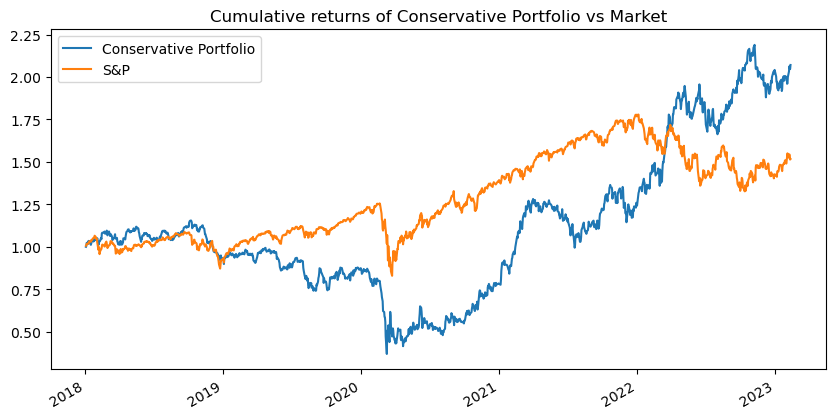

In [146]:
# Calculate cumulative returns and plot them vs market
df_cumulative_returns = (1 + synthetic_portfolio_returns).cumprod()

#df_cumulative_returns.plot(figsize=(20,10), title="Cumulative returns of Conservative Portfolio")

ax = df_cumulative_returns.plot(figsize=(10,5), title="Cumulative returns of Conservative Portfolio vs Market")
df_market_cum_returns.plot(ax=ax)

ax.legend(['Conservative Portfolio',
         'S&P'])



<AxesSubplot:title={'center':'Spread of daily returns of Portfolio'}>

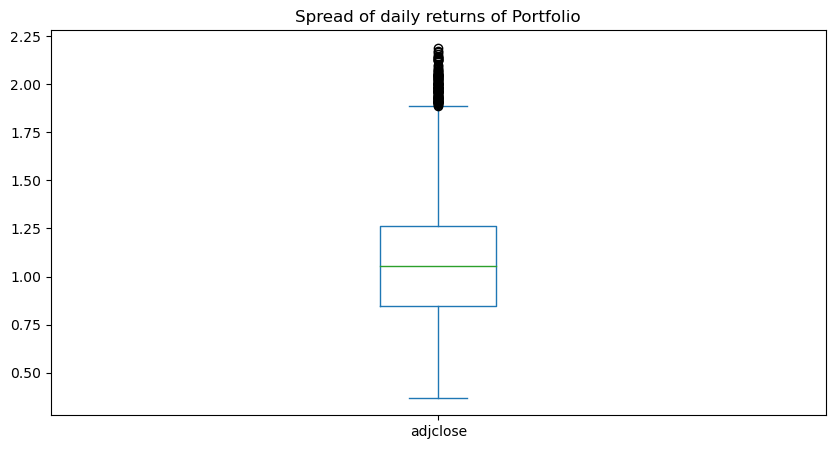

In [147]:
# Volatility Analysis

df_cumulative_returns.plot(kind='box', figsize=(10,5), title="Spread of daily returns of Portfolio")

In [148]:
# Calculate the standard deviation
portfolio_standard_dev = df_cumulative_returns.std()
portfolio_standard_dev

adjclose    0.426676
dtype: float64

In [149]:
# Calculate the annualized standard deviation (252 trading days)
trading_days = 252

annual_portfolio_standard_dev = df_cumulative_returns.std() * np.sqrt(trading_days)
annual_portfolio_standard_dev

adjclose    6.773264
dtype: float64

In [150]:
# Plot Standard deviation vs S&P500

In [151]:
# Analyse Risk-return profile

# Annual average return
annual_average_portfolio_returns = synthetic_portfolio_returns.mean() * trading_days
annual_average_portfolio_returns


adjclose    0.225907
dtype: float64

In [152]:
# Annualized Sharpe Ratio
portfolio_sharpe_ratio = annual_average_portfolio_returns / annual_portfolio_standard_dev
portfolio_sharpe_ratio

adjclose    0.033353
dtype: float64

In [153]:
# BETA ANALYSIS

# Calculate the variance of the S&P 500 using a rolling 60-day window.
variance_market_60 = market_daily_return.rolling(window=60).var()

# Calculate the covariance of the Portfolio using a 60-day rolling window 
portfolio_cov = synthetic_portfolio_returns.rolling(window=60).cov(market_daily_return)

# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
portfolio_beta = portfolio_cov/variance_market_60

# Calculate the average of the 60-day rolling beta
#portfolio_beta.mean()
portfolio_beta.mean()

adjclose    0.767519
dtype: float64

<AxesSubplot:title={'center':'Portfolio 60-day rolling Beta'}>

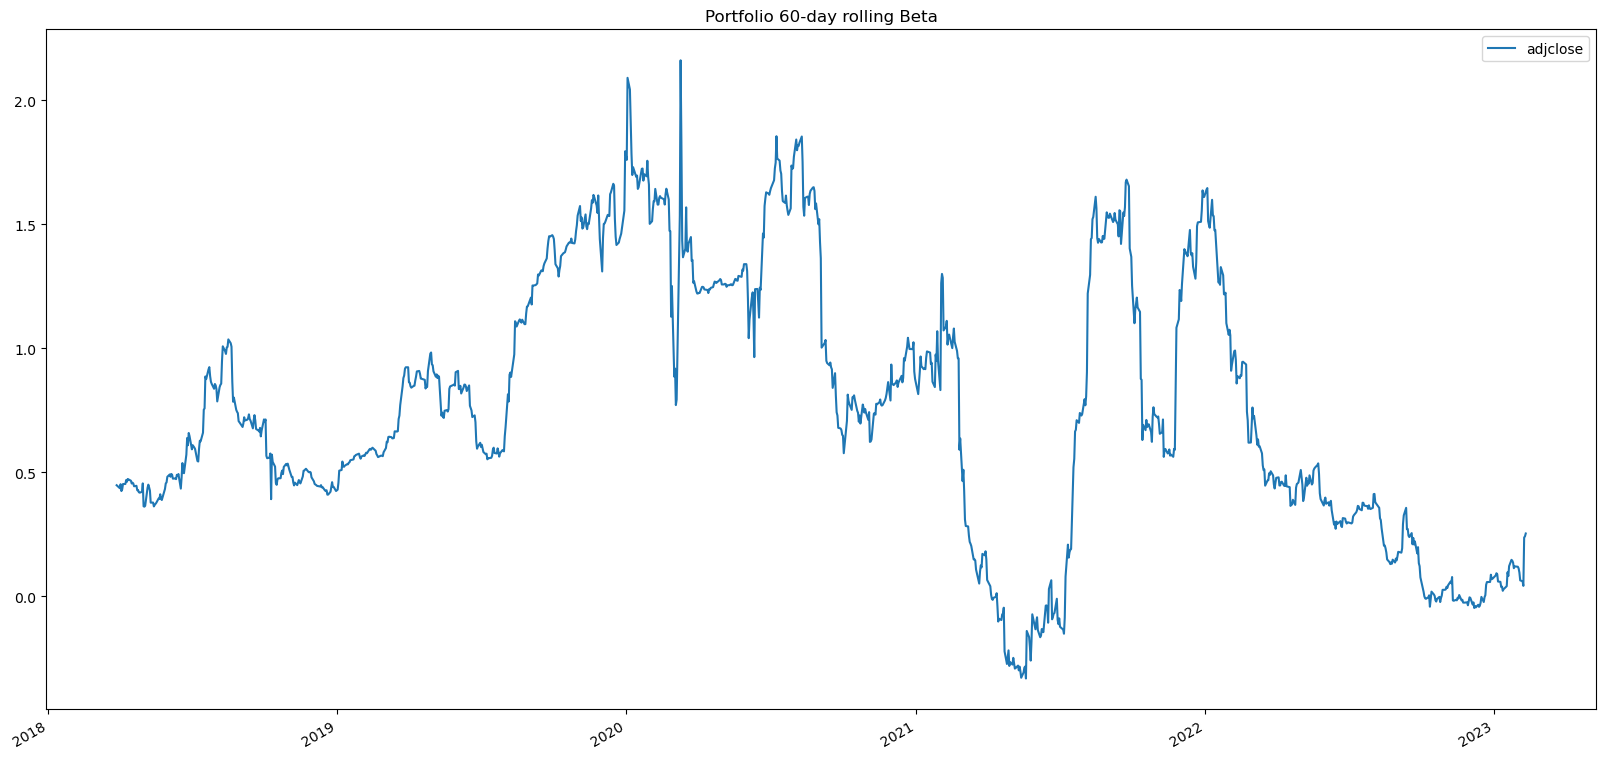

In [154]:
# Plot the rolling beta 
portfolio_beta.plot(figsize=(20,10), title="Portfolio 60-day rolling Beta")

# Plot Beta of 2 Portfolios
# ax = berkshire_beta.plot(figsize=(20,10), title="Beta Berkshire vs Tiger")
# tiger_beta.plot(ax=ax)

# ax.legend(['BERKSHIRE Beta',
#           'TIGER Beta'])

Monte Carlo simulation of 200 samples and 10 years for each Portfolio (composition stocks/bonds/cryptos/commodities)

In [155]:
# 1. Conservative: 20%/60%/10%/10%

ten_year_simulation = MCSimulation(
    portfolio_data = ticker_data,
    weights=[0.20,0.60,0.10,0.10],
    num_simulation = 200,
    num_trading_days =252*10
)

# Review the simulation input data
ten_year_simulation.portfolio_data.head()


^GSPC                                                      \
                   open         high          low        close     adjclose   
2018-01-02  2683.729980  2695.889893  2682.360107  2695.810059  2695.810059   
2018-01-03  2697.850098  2714.370117  2697.770020  2713.060059  2713.060059   
2018-01-04  2719.310059  2729.290039  2719.070068  2723.989990  2723.989990   
2018-01-05  2731.330078  2743.449951  2727.919922  2743.149902  2743.149902   
2018-01-08  2742.669922  2748.510010  2737.600098  2747.709961  2747.709961   

                                        ^TNX                ...       BTC-USD  \
                  volume daily_return   open   high    low  ...      adjclose   
2018-01-02  3.397430e+09          NaN  2.433  2.480  2.425  ...  14982.099609   
2018-01-03  3.544030e+09     0.006399  2.451  2.465  2.440  ...  15201.000000   
2018-01-04  3.697340e+09     0.004029  2.473  2.487  2.449  ...  15599.200195   
2018-01-05  3.239280e+09     0.007034  2.465  2.480  2.436  ...  17429.500000   
2018-01-08  3.246160e+09     0.001662  2.471  2.489  2.462  ...  15170.099609   

                                            BZ=F                        \
                  volume daily_return       open       high        low   
2018-01-02  1.684660e+10          NaN  66.419998  67.279999  66.230003   
2018-01-03  1.687190e+10     0.014611  66.489998  68.010002  66.400002   
2018-01-04  2.178320e+10     0.026196  68.000000  68.260002  67.529999   
2018-01-05  2.384090e+10     0.117333  68.059998  68.089996  67.269997   
2018-01-08  1.841390e+10    -0.129631  67.820000  67.980003  67.449997   

                                                        
                close   adjclose   volume daily_return  
2018-01-02  66.570000  66.570000  24294.0          NaN  
2018-01-03  67.839996  67.839996  25878.0     0.019078  
2018-01-04  68.070000  68.070000  22840.0     0.003390  
2018-01-05  67.620003  67.620003  18290.0    -0.006611  
2018-01-08  67.779999  67.779999  17704.0     0.002366  

[5 rows x 28 columns]

In [156]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
ten_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999418,1.003285,1.040692,0.942535,1.037039,1.002245,1.031717,0.989700,0.988764,0.982462,...,0.996129,1.029611,1.055214,0.992416,0.969502,0.997473,1.003909,0.953114,1.009632,0.988330
2,1.067624,0.996959,1.020457,0.952018,1.055532,0.996945,1.036923,1.005872,1.015953,0.977851,...,0.993556,1.058388,1.056089,0.975337,0.960752,1.014587,1.000749,0.940937,1.024143,0.962457
3,1.041031,0.988711,1.019279,0.943268,1.061078,1.032212,1.014086,0.973298,1.019213,0.995687,...,0.984817,1.045583,1.055665,0.973374,0.965181,0.985324,0.995223,0.941427,1.022658,0.928549
4,1.053934,1.016555,0.970100,0.945617,1.044003,1.023695,1.019028,0.934850,1.074063,1.006683,...,0.967542,1.041429,1.105222,0.982731,0.943551,0.986406,0.992815,0.943343,1.020704,0.915520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.147321,4.020013,7.851767,28.230217,3.900140,11.544078,1.663954,2.639381,7.818087,0.447010,...,22.057857,1.807863,6.479224,24.893321,26.447517,1.479739,4.628121,42.282774,1.716560,1.115677
2517,1.087594,3.903968,7.624628,27.511776,4.049563,11.963517,1.632219,2.579256,7.899541,0.446081,...,22.079508,1.756407,6.620396,25.671968,25.860926,1.488188,4.534455,42.609804,1.708503,1.113868
2518,1.081774,3.764044,7.631775,27.322076,4.011194,11.412140,1.655945,2.510970,8.262421,0.442671,...,22.470497,1.741256,6.711746,26.122282,25.979887,1.542588,4.357640,41.044301,1.679472,1.078935
2519,1.087407,3.642151,7.643226,27.640005,4.108461,11.662240,1.668552,2.402872,8.415669,0.441059,...,22.540498,1.701603,6.900552,25.527486,25.076702,1.520351,4.390012,40.868531,1.601798,1.122670


<AxesSubplot:title={'center':'200 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

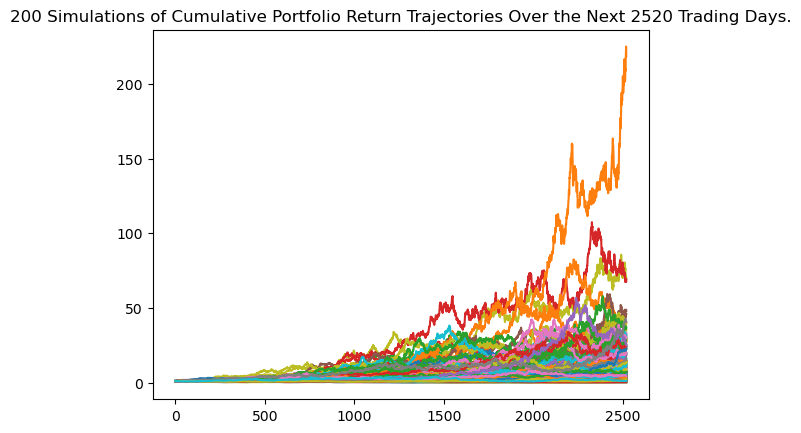

In [157]:
# Visualize the Monte Carlo simulation by creating an overlay line plot
ten_year_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 200 Simulations'}, ylabel='Frequency'>

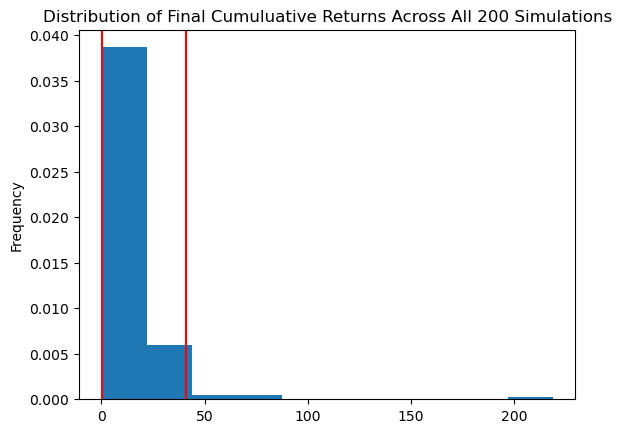

In [158]:
# Visualize the probability distribution of the Monte Carlo simulation by plotting a histogram
ten_year_simulation.plot_distribution()

In [159]:
# Generate Stats and state Forecast

stats_ten = ten_year_simulation.summarize_cumulative_return()
stats_ten

count           200.000000
mean             10.651111
std              18.858124
min               0.120537
25%               2.205590
50%               4.937379
75%              11.945059
max             218.572529
95% CI Lower      0.479847
95% CI Upper     40.922706
Name: 2520, dtype: float64

In [160]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(stats_twenty[8]*invested_amount,2)
ci_upper_ten_cumulative_return = round(stats_twenty[9]*invested_amount,2)

# Print the result of your calculations
print(f"""There is a 95% chance that the final portfolio
value after 20 years will be within the range of
${ci_lower_ten_cumulative_return:,.2f} and ${ci_upper_ten_cumulative_return:,.2f} based
upon an initial investment of ${invested_amount:,.2f}
""")

There is a 95% chance that the final portfolio
value after 20 years will be within the range of
$63,494.79 and $4,806,476.28 based
upon an initial investment of $100,000.00

